# Attrition Analysis for HR

For this project the IBM Attrition Rate Analytics dataset was used.

# 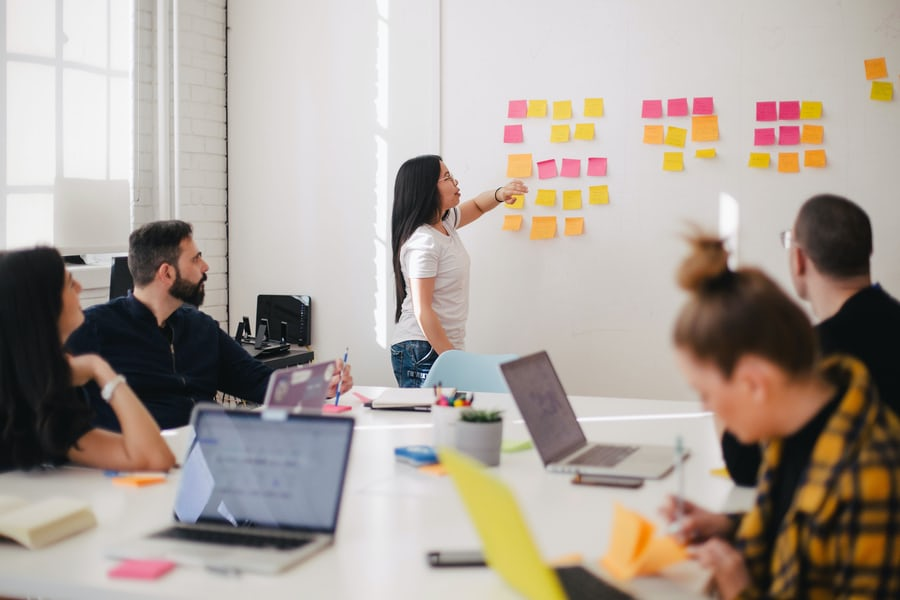

Table of contents:

1.Problem Definition
2.Data Analysis
3.EDA Concluding Remarks
4.Pre-processing Pipeline
5.Building Machine Learning Models
6.Concluding Remarks

# 1.Problem Definition

Attrition in human resources is the loss of employees over time.  In almost all companies a high attrition rate causes problems. 

For instance:
•	Attrition is expensive.  Job postings, hiring processes, paperwork and new hire training all     incur extra expenses.
•	Attrition causes losses to the company’s knowledge base. New employees don’t have the same       experience and familiarity with procedures.
•	Attrition contributes to errors and inconsistencies. 

By analyzing the data, HR teams can gain insight into the reasons that the company are losing employees and design strategies to retain more employees.  Compensation programs, work culture and motivational systems are common strategies to consider.


# In this project we have two objectives:

A.	Analyze the data to isolate indicators of attrition that will enable the HR team to improve       or implement strategies to improve the retention of employees. 

B.	Create a model to predict the likelihood of each employee staying with the company or             choosing to move on. This will give HR team a tool to recognize employees who the company are     in danger of losing and to act proactively in order to retain them.


# 2.Data Analysis

# We start by loading and taking a look at the features of the  raw data

In [1]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
ds=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
ds.shape

(1470, 35)

In [5]:
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Check and treat null values

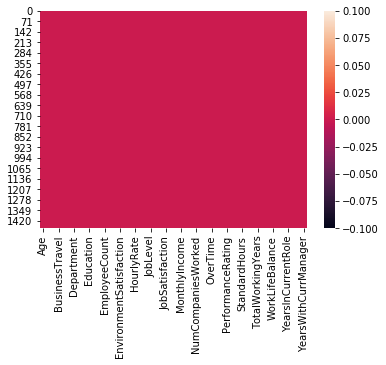

In [6]:
sns.heatmap(ds.isnull())

No null values present.

In [7]:
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No action needs to be taken.

# Check correlation

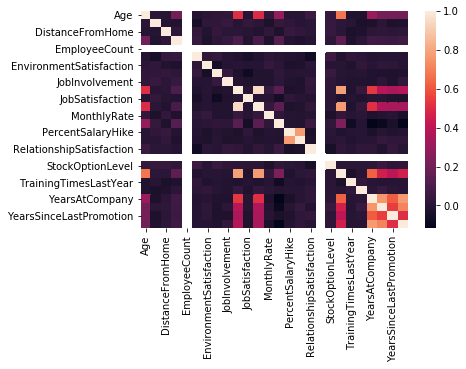

In [8]:
dscor=ds.corr()
sns.heatmap(dscor)

No information can be gathered on the target column (Attrition) which is unlabeled but can be found under the "Age" column, because it has an object datatype. We will need to check it again after encoding the categorical data.

# Summary statistics

In [9]:
ds.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Standard deviations look normal for the most part, there are a few that are very large which indicates that the parameter will have a wide spread which is usually not ideal. After taking a look at the means, maximums and the type of parameter nothing looks problematic.

# Data visualizations

In [10]:
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Check eveness of dataset

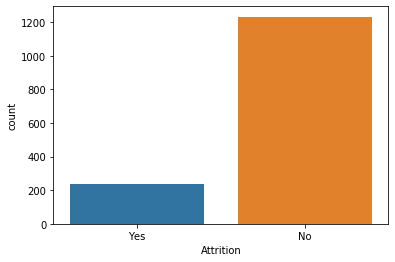

In [11]:
# show the amount of employees retained vs lost
sns.countplot(ds['Attrition'])

The company retains far more employees than they lose.

In [12]:
year_percentage = ds['Attrition'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
year_percentage

No     83.9%
Yes    16.1%
Name: Attrition, dtype: object

This is significant because the elements in the target column (Attrition) are not equally distributed and it will affect the model’s ability to predict the less common element accurately as it has less data for those instances and when partitioning the dataset the less common element might not be properly represented in the sample. The best way to make sure that both possibilities are represented in the sections used for training is to stratify the data on the target column during the Train-Test Split.

# Comparisons across the entire dataset

In [13]:
# Show the mean values across all columns for the Attrition column
grouped_ds = ds.groupby('Attrition')

means = grouped_ds.mean()
means

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Judging by the above means for employees retained and lost the employees that were lost were worse off in all aspects except the time of their last job promotion. This suggests that being promoted is not the most important factor to employees. Also, older employees are more likely to stay. 

In [14]:
# Show the max values across all columns for the Attrition column
grouped_ds = ds.groupby('Attrition')

max = grouped_ds.max()
max

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,60,Travel_Rarely,1499,Sales,29,5,Technical Degree,1,2068,4,...,4,80,3,38,6,4,37,18,15,17
Yes,58,Travel_Rarely,1496,Sales,29,5,Technical Degree,1,2055,4,...,4,80,3,40,6,4,40,15,15,14


From the above we can gather that some employees retire early as they are unlikely to leave to a new company so late in their careerss and all the other variables are very similar. The company can look into incentives for employees to stay until retirement age.

In [15]:
# Show the min values across all columns for the Attrition column
grouped_ds = ds.groupby('Attrition')

min = grouped_ds.min()
min

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,18,Non-Travel,102,Human Resources,1,1,Human Resources,1,2,1,...,1,80,0,0,0,1,0,0,0,0
Yes,18,Non-Travel,103,Human Resources,1,1,Human Resources,1,1,1,...,1,80,0,0,0,1,0,0,0,0


From the above we can gather that some young employees with low education levels will leave their positions due to personal preferences as all of their scores are identcal. Ideally employees with these scores should have a less significant weigting in the considerations as it is not necessarily within the company's control and these employees are more easily replaced. Alternatively they can spend more time during recruitment to ensure a better fit for the company which would help them retain more employees.

# First the parameters were analyzed using boxplots. The boxplots compare the columns on the basis of whether attrition took place or not. The following columns all have negative correlation with the target column.

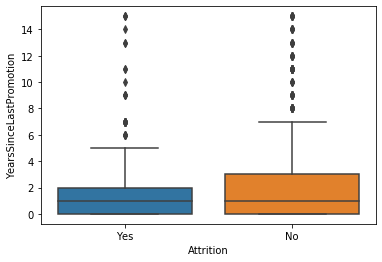

In [16]:
sns.boxplot(x='Attrition',y='YearsSinceLastPromotion',data=ds)

Years since last promotion does not seem to be a motivating factor to retain employees.

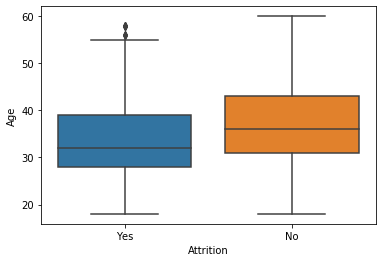

In [17]:
sns.boxplot(x='Attrition',y='Age',data=ds)

Older employees are less likely to leave.

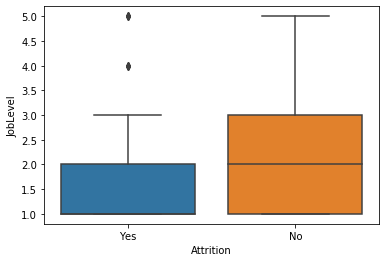

In [18]:
sns.boxplot(x='Attrition',y='JobLevel',data=ds)

Employees with a higher job level are less likely to leave.

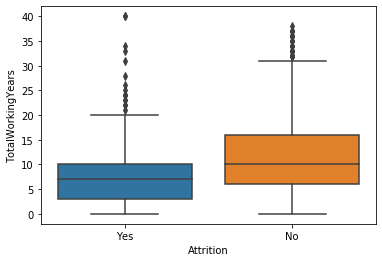

In [19]:
sns.boxplot(x='Attrition',y='TotalWorkingYears',data=ds)

Employees who have worked for the company for longer are less likely to leave.

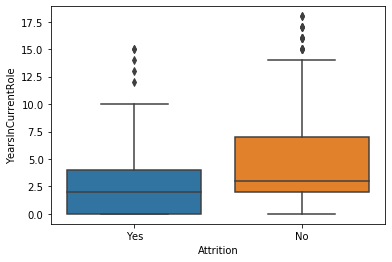

In [20]:
sns.boxplot(x='Attrition',y='YearsInCurrentRole',data=ds)

Employees who have been in their roles for longer are less likely to leave.

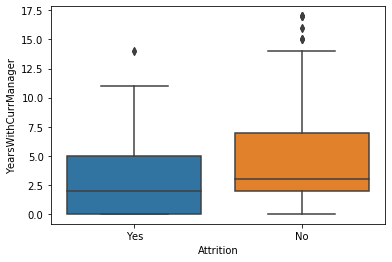

In [21]:
sns.boxplot(x='Attrition',y='YearsWithCurrManager',data=ds)

Employees who have worked under the same manager for longer are less likely to leave.

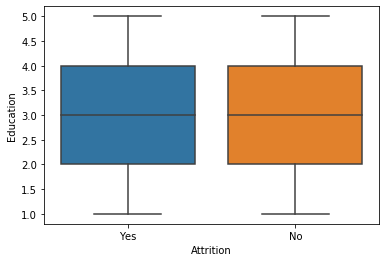

In [22]:
sns.boxplot(x='Attrition',y='Education',data=ds)

Education does not seem to be a deciding factor in attrition.

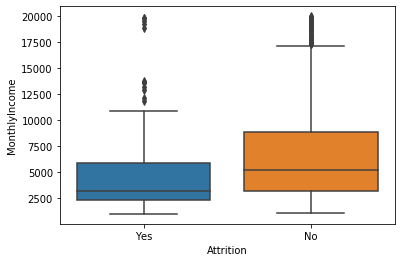

In [23]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=ds)

Employees with a lower monthly income are far more likely to leave the company. It is an important factor in attrition.

# Then follows the boxplot comparisons with positively correlated columns.

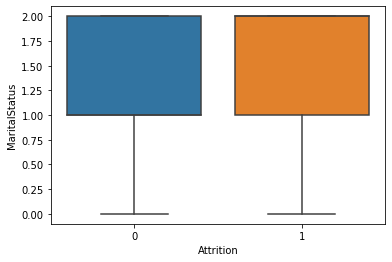

In [68]:
sns.boxplot(x='Attrition',y='MaritalStatus',data=eds)

Ironically Marital Status does not seem to affect attrition which is strange considering it shows up as one of the best positive correlations in the dataset.

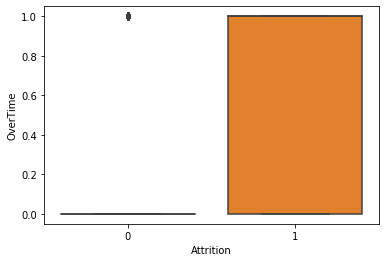

In [69]:
sns.boxplot(x='Attrition',y='OverTime',data=eds)

Employees who work overtime are far more likely to leave.

# After that the parameters are again analyzed while being grouped by departments, to see if the parameters are different over the departments.

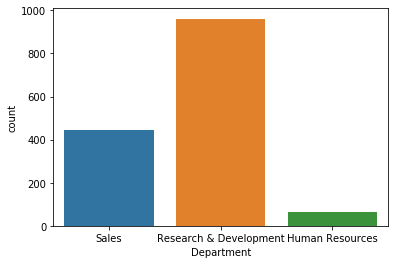

In [25]:
# Show amount of employees per department
sns.countplot(ds['Department'])

Research is by far the largest department, followed by sales and finally HR is the smallest department.

In [26]:
all_department_percentage = ds['Department'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
all_department_percentage

Research & Development    65.4%
Sales                     30.3%
Human Resources            4.3%
Name: Department, dtype: object

The data is not distributed evenly over departments or attrition which will affect the accuracy of the accuracy scores.

In [27]:
# Show the amount of employees per department
ds.groupby(['Department'])['Department'].count()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64

In [28]:
# Show the amount of employees retained (No) vs lost (Yes) per department
ds.groupby(['Attrition','Department'])['Department'].count()

Attrition  Department            
No         Human Resources            51
           Research & Development    828
           Sales                     354
Yes        Human Resources            12
           Research & Development    133
           Sales                      92
Name: Department, dtype: int64

In [29]:
print('Percentage HR employees that left the company',12/63*100)
print('Percentage Research employees that left the company',133/961*100)
print('Percentage Sales employees that left the company',92/446*100)

Percentage HR employees that left the company 19.047619047619047
Percentage Research employees that left the company 13.839750260145681
Percentage Sales employees that left the company 20.62780269058296


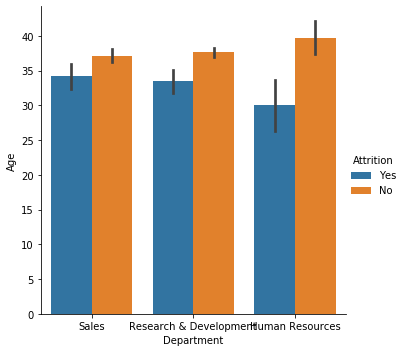

In [30]:
# Show the average age of employees by department for attrition
sns.catplot(x='Department', y= 'Age', hue='Attrition', data=ds, kind='bar')

The HR department loses younger employees than any other deparment,followed by the Research department.

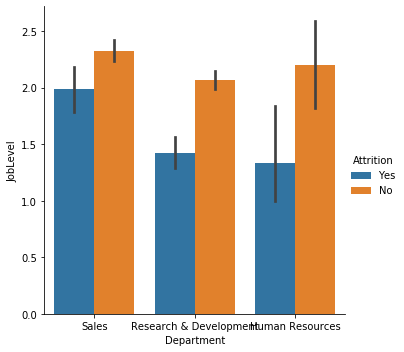

In [31]:
# Show the average Job Level for employees by department for attrition
sns.catplot(x='Department', y= 'JobLevel', hue='Attrition', data=ds, kind='bar')

The HR department loses employees employees with a lower Job Level than any other deparment,followed by the Research department.

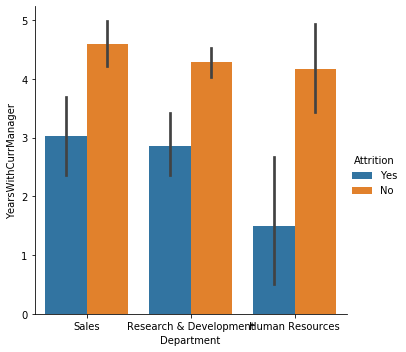

In [32]:
# Show the average Yers with Current Manager for employees by department for attrition
sns.catplot(x='Department', y= 'YearsWithCurrManager', hue='Attrition', data=ds, kind='bar')

Employees who have been with their current managers for a shorter period of time are more likely to resign, especially in the HR department, followed by the research department. 

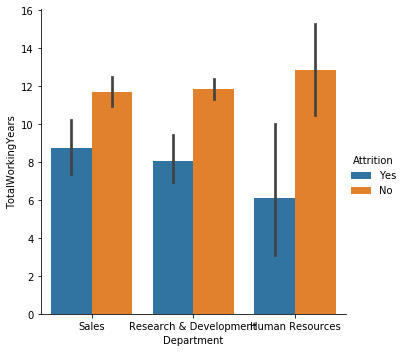

In [33]:
# Show the average Total Working Years for employees by department for attrition
sns.catplot(x='Department', y= 'TotalWorkingYears', hue='Attrition', data=ds, kind='bar')

Employees who have been with the company for a shorter period of time are more likely to resign, especially in the HR department. Employees in the Sales department are more likely to resign after many years at the company than any other department.

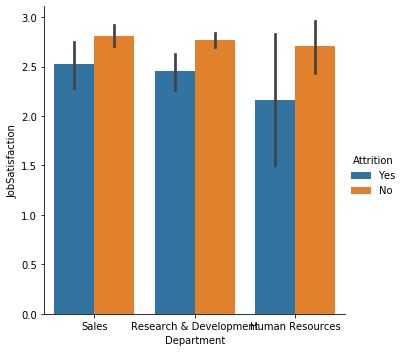

In [34]:
sns.catplot(x='Department', y= 'JobSatisfaction', hue='Attrition', data=ds, kind='bar')

Employees with lower job satisfaction levels are more likely to resign. Especially in HR. HR seemsto be the department with the lowest levels of job satisfaction overall. They can look at team building activities for HR. It seems natural though because the other employees will be more attached to their specific field of knowledge.

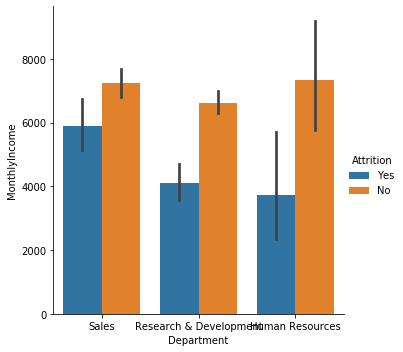

In [35]:
sns.catplot(x='Department', y= 'MonthlyIncome', hue='Attrition', data=ds, kind='bar')

Employees with a lower monthly income are far more likely to resign. In sales it seems to matter less.

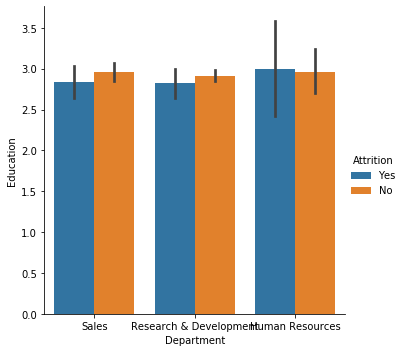

In [36]:
sns.catplot(x='Department', y= 'Education', hue='Attrition', data=ds, kind='bar')

Education does not seem to contribute greatly to attrition. The HR department are most likely to suffer losses of well educated employees.

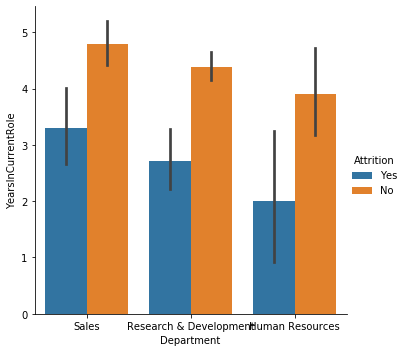

In [37]:
sns.catplot(x='Department', y= 'YearsInCurrentRole', hue='Attrition', data=ds, kind='bar')

Employees are more likely to resign if they have been in a role for a shorter period of time.

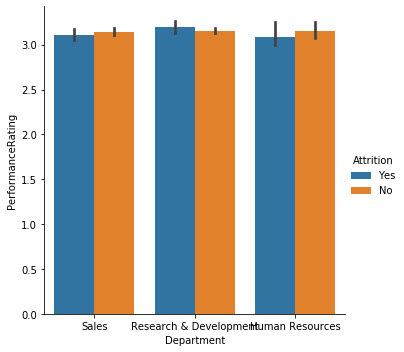

In [38]:
sns.catplot(x='Department', y= 'PerformanceRating', hue='Attrition', data=ds, kind='bar')

An employee's performance rating does not seem to make them more likely to resign.

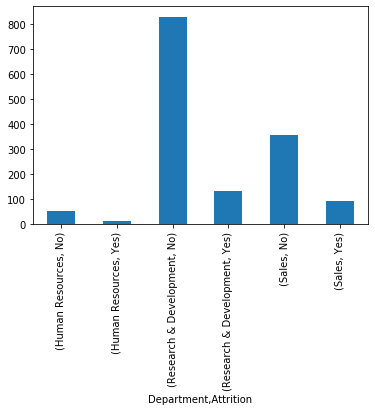

In [39]:
# Show Attrition (yes and no) by department
ds.groupby('Department')['Attrition'].value_counts().head(51).plot.bar()

# Encode categorical columns to numeric values

In [40]:
eds=ds

In [41]:
eds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [42]:
eds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [43]:
# Encode one or specific columns in a dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Attrition', 'BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole','MaritalStatus','Over18', 
      'OverTime'] 
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [44]:
eds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


# Check Correlation after Label Encoding

The correlation is checked after the label encoding beacause it adds information that was not able to be correlated before.  The heatmap is used to determine the parameters that are strongly correlated to the target column to assist with data analysis.  It is done after the data analysis in the notebook in orederto keep the categorial labels during data analysis.

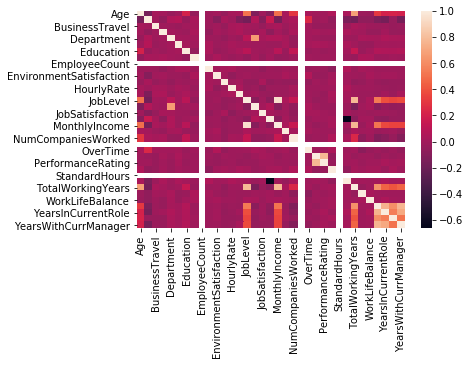

In [45]:
edscor=eds.corr()
sns.heatmap(edscor)

The target column is not labeled but is the second row and column in the heatmap of both illustrations.

In the initial correlation no correlation can be seen to the target column.

In the correlation after label encoding OverTime shows the strongest positive correlation followed by MarritalStatus.

Age, JobLevel, MonthlyIncome, TotalWorkingYears, YearsinCurrentRole and YearsWithCurrManager have a weak negative correlation with the target column.
Data visualization will now be done with these parameters.


The analysis will therefore focus on the following parameters:

Age                         
JobLevel                     
MaritalStatus               
MonthlyIncome                
OverTime                    
TotalWorkingYears            
YearsInCurrentRole           
YearsWithCurrManager 

This does not mean that the remaining parameters have no correlation to the target column.

# 3.EDA Concluding Remarks

From the boxplots we can make the following deductions about attrition in general:

Negatively correlated parameters:

  
Age = Older employees are less likely to leave.

Job Level = Employees with a higher job level are less likely to leave.

Monthly Income = Employees with a higher monthly income are less likely to                  leave the company. 

Total Working Years = Employees who have worked for the company for longer                       are less likely to leave.

Years In Current Role = Employees who have been in their roles for longer                           are less likely to leave.

Years With Current Manager = Employees who have worked under the same                                    manager for longer are less likely to leave.

Years since Last Promotion = Does not seem to be a motivating factor to                                  retain employees. In fact the employees who                                left have the same average and many employees                              who stayed haven't had a promotion for much                                longer.


Positively correlated parameters:

Marital Status = Does not seem to have an effect on attrition which is                      surprising considering it is shown to have positive 
Overtime = Employees who work overtime are far more likely to leave.


# How the parameters perform over departments:
    

Age = The HR department loses more of their young employees than any other       deparment,followed by the Research department.

Job Level = The HR department loses employees employees with a lower Job               Level than any other deparment,followed by the Research                     department.

Monthly Income = Employees with a lower monthly income are far more likely                  to resign. In sales it seems to matter less. 

Total Working Years = Employees who have been with the company for a                             shorter period of time are more likely to resign,                           especially in the HR department. Employees in the                           Sales department are more likely to resign after many                       years at the company than any other department.

Years In Current Role = Employees are more likely to resign if they have                           been in a role for a shorter period of time.

Years With Current Manager = Employees who have been with their current                                  managers for a shorter period of time are more                              likely to resign, especially in the HR                                      department, followed by the research                                        department. 

Years since Last Promotion = 

Job Satisfaction = Employees with lower job satisfaction levels are more                      likely to resign. Especially in HR. HR seemsto be the                      department with the lowest levels of job satisfaction                      overall. They can look at team building activities for                      HR. It seems natural though because the other employees                    will be more attached to their specific field of                            knowledge.

Education = Education does not seem to contribute greatly to attrition. The             HR department are most likely to suffer losses of well educated             employees.

Performance Rating = An employee's performance rating does not seem to make                      them more likely to resign.

Generally the attrition percentage over the departments are:
HR = 19.1
Research = 13.8
Sales = 20.6

Since Sales and HR have the highest percentages of attrition it would make sense to start more targeted strategies aimed at these departments.

# 4.Pre-processing Pipeline

# Drop irrelevant columns

In [46]:
eds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [47]:
ds['StandardHours'].unique()

array([80], dtype=int64)

In [48]:
ds['OverTime'].unique()

array([1, 0])

In [49]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=eds.drop(columns=[ 'EducationField', 'EmployeeCount',
       'EmployeeNumber', ])

In [50]:
nds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,2,0,94,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,3,1,61,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,92,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,4,0,56,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,1,1,40,...,4,80,1,6,3,3,2,2,2,2


# Find and remove outliers

In [51]:
nds.shape

(1470, 32)

In [52]:
nds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

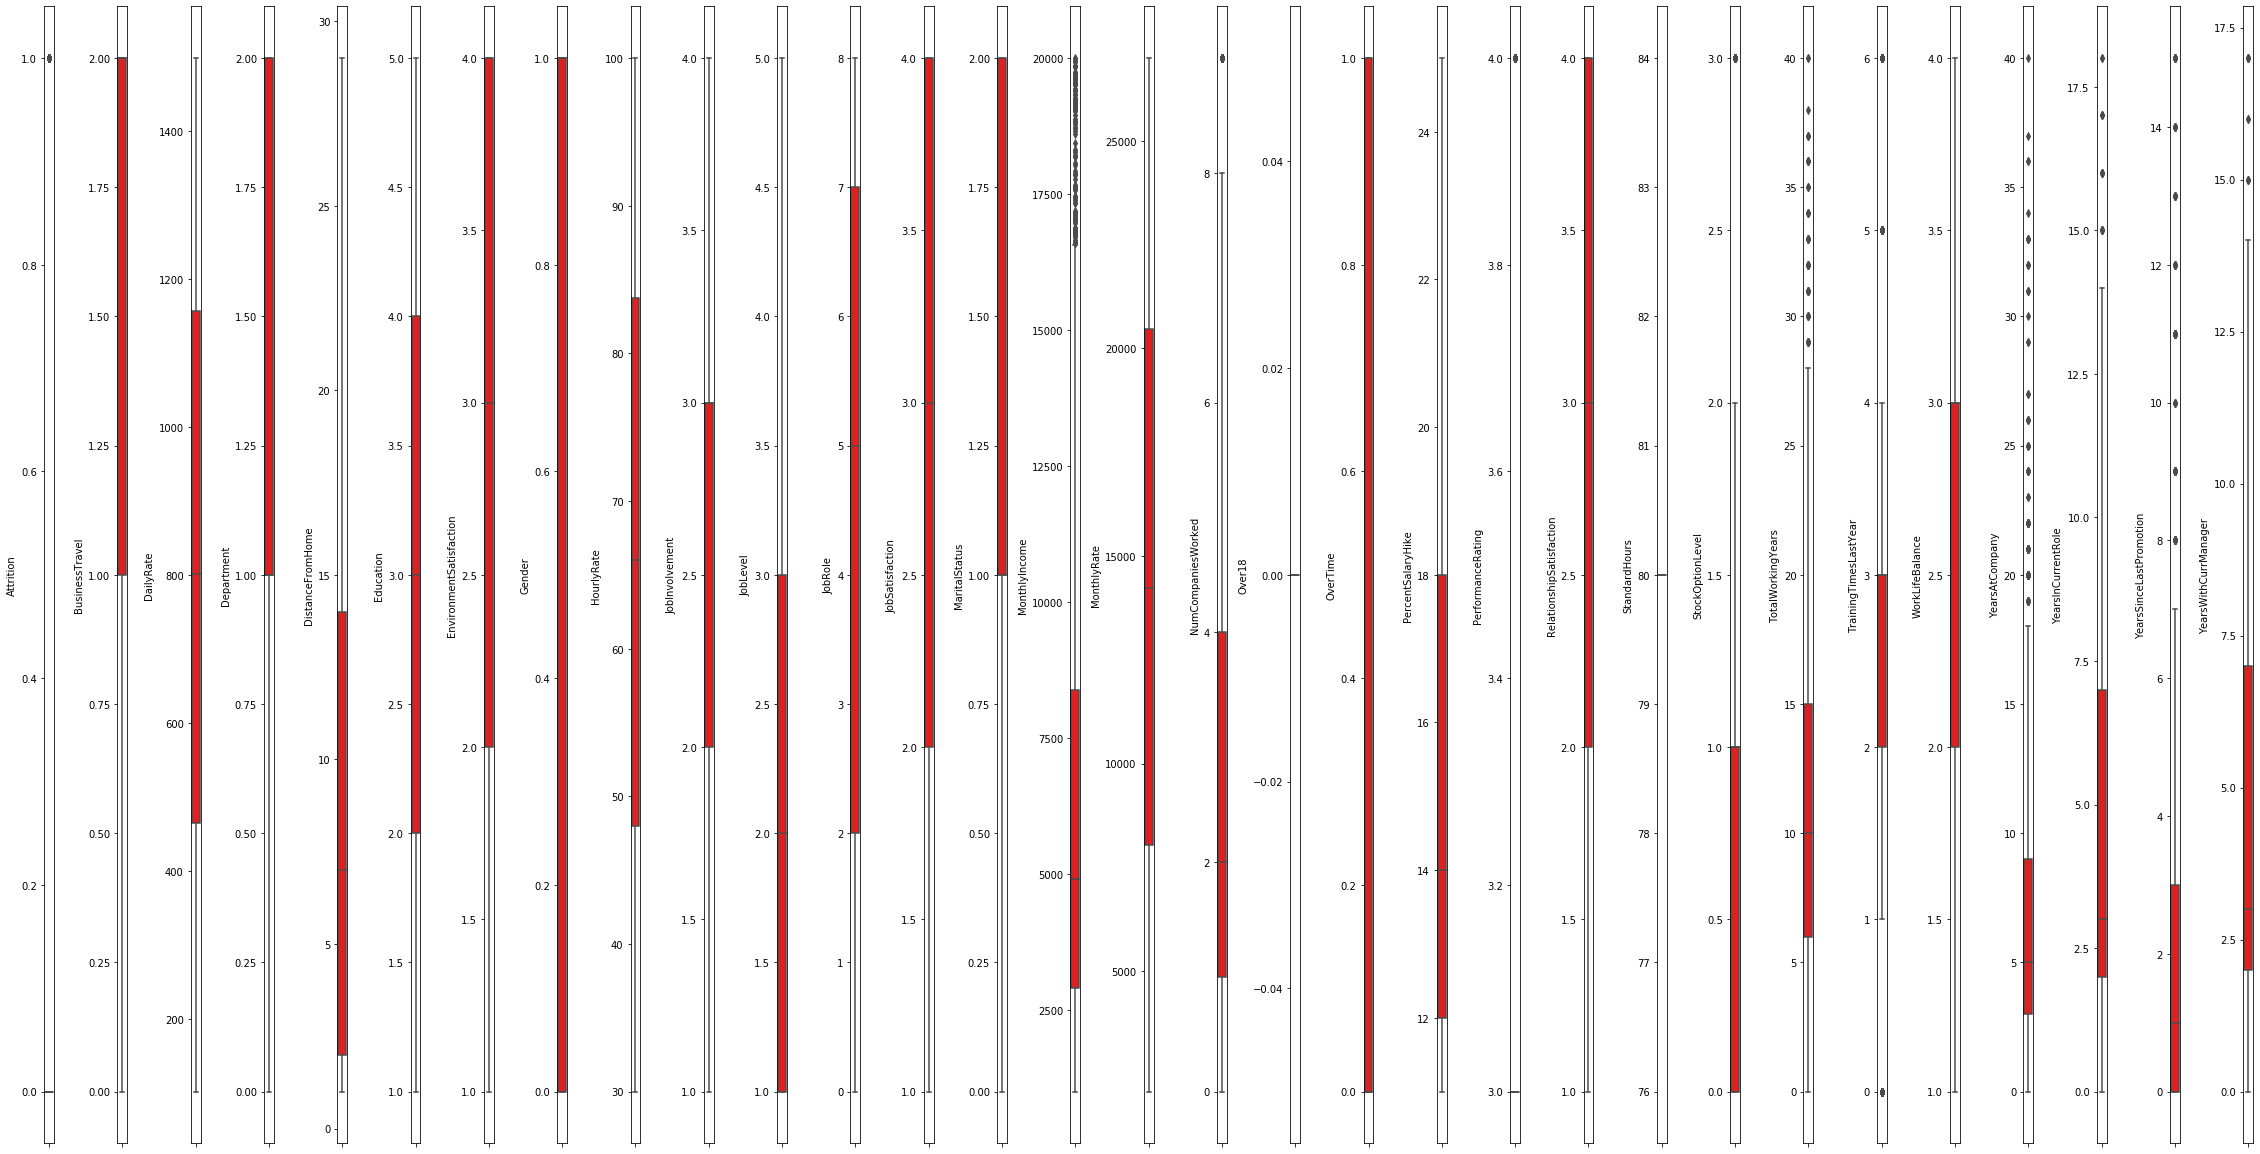

In [53]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=32
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

When I tried to remove the outliers with the zscore it removed all columns, so I skipped this step. 

# Check and adjust skewness

In [54]:
nds.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Treatments for skewness were ineffective.

# Split data into x and y

In [55]:
nds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [56]:
# Lineup target and input values
nds_x=nds.drop(columns=['Attrition'])
y=nds[['Attrition']]

No scaler was applied because it brought down the model scores.

# Train-Test split

In [57]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(nds_x,y, random_state=55, test_size=0.20, stratify=nds['Department'])

# 5.Building Machine Learning Models

Several models were tested, including:
    
    RandomForrestClassifier
    AdaBoostClassifier
    KNeighborsClassifier(n_neighbors= 9)
    LogisticRegression(penalty= 'l2')
    DecisionTreeClassifier(criterion='gini')
    GaussianNB()
    
But the final model selected was the:
    
    GradientBoostingClassifier(learning_rate= 0.1, n_estimators=       
    100,random_state=42)
    
    Because it has the best scores with the train-test split stratified   
    over the target column :
        

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
# Find best parameters for Gradient Boosting technique with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(nds_x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

0.8809523809523809
[[235   3]
 [ 32  24]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       238
           1       0.89      0.43      0.58        56

    accuracy                           0.88       294
   macro avg       0.88      0.71      0.75       294
weighted avg       0.88      0.88      0.86       294

roc_auc_score =  0.707983193277311
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False positive rate')

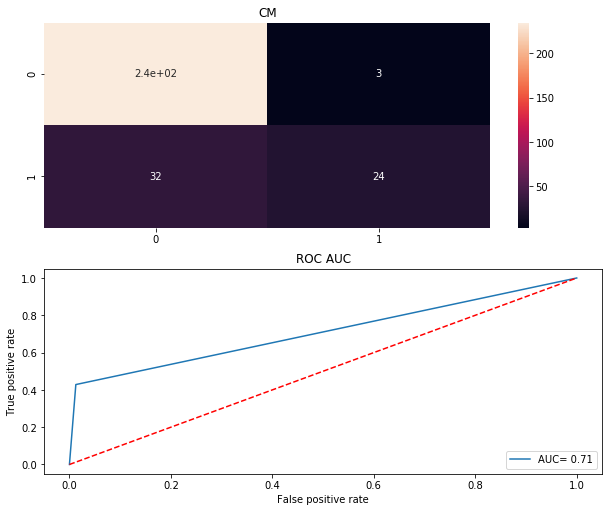

In [63]:
# Find scores for GradientBoostingClassifier

gbr=GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 100,random_state=42)
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print(accuracy_score(y_test,predgbr))
print(confusion_matrix(y_test,predgbr))
print(classification_report(y_test,predgbr))

false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predgbr)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score = ', roc_auc)
cm=confusion_matrix(y_test,predgbr)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('CM')
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title("ROC AUC")
plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

# Show the best scoring model without stratification on the target column.

We ultimately rejected it as the score of the stratified train-test split is more trusworthy .

In [64]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(nds_x,y, random_state=55, test_size=0.20)

0.8945578231292517
[[250  10]
 [ 21  13]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       260
           1       0.57      0.38      0.46        34

    accuracy                           0.89       294
   macro avg       0.74      0.67      0.70       294
weighted avg       0.88      0.89      0.89       294

roc_auc_score =  0.671945701357466
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False positive rate')

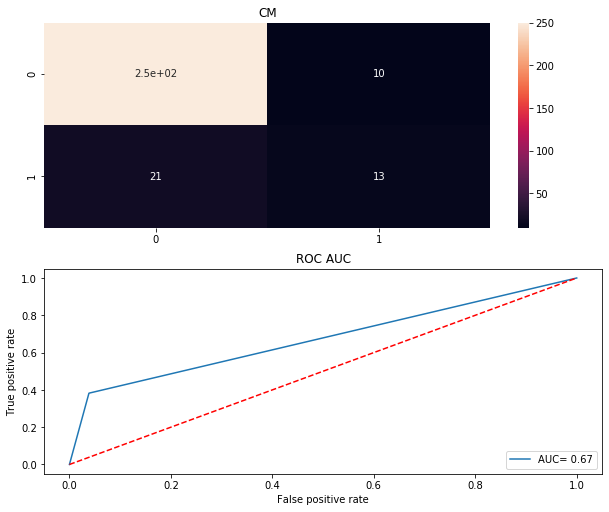

In [65]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predad)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score = ', roc_auc)
cm=confusion_matrix(y_test,predad)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('CM')
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title("ROC AUC")
plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

# Save the model

In [66]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(gbr,'Attrition.pkl')

['Attrition.pkl']

In [67]:
# Load and use model to make a prediction
model=joblib.load('Attrition.pkl')
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

# 6.Concluding Remarks

Objective B:

With the help of the model created for this project the HR department will be able to predict with 88.1% accuracy whether or not individuals will resign or not. They can then act preemptively to prevent it.

Objective A:

They can then use the data anylysis on the individual parameters and look at them in more detail with regards to the department the employee is in.

They can also design general strategies company wide and more spesific ones per deparment.
